In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import numpy as np
import warnings
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import RFECV
plt.style.use('seaborn-bright')

df = pd.read_csv('C:/ds_work/source_code/Project_DS/data/train.csv')

In [3]:
## 데이터프레임 만들기

df_notsleep = df[df['CryoSleep']==0]
df_notsleep

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8686,9275_02,Europa,False,A/97/P,TRAPPIST-1e,32.0,False,1.0,1146.0,0.0,50.0,34.0,Diram Conable,False
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [4]:
df_PSO = df_notsleep[df_notsleep['Destination']=='PSO J318.5-22']
df_PSO

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
69,0073_01,Mars,False,D/3/P,PSO J318.5-22,37.0,False,46.0,83.0,738.0,0.0,12.0,Gorn Make,False
91,0099_01,Earth,False,F/19/P,PSO J318.5-22,23.0,False,311.0,427.0,526.0,37.0,0.0,Aliey Leetersoney,False
126,0136_01,Earth,False,G/23/S,PSO J318.5-22,47.0,False,97.0,418.0,126.0,25.0,55.0,NaN,False
173,0196_01,Mars,False,D/5/P,PSO J318.5-22,25.0,False,1052.0,0.0,719.0,0.0,7.0,Caper Emead,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8594,9174_01,Earth,False,G/1479/S,PSO J318.5-22,54.0,False,65.0,670.0,0.0,177.0,0.0,Teryla Lunapperts,True
8609,9189_01,Earth,False,F/1777/S,PSO J318.5-22,18.0,False,87.0,41.0,483.0,0.0,0.0,Ralda Barnoldeney,False
8611,9192_01,Earth,False,F/1880/P,PSO J318.5-22,24.0,False,NaN,599.0,NaN,0.0,0.0,Norahe Drakeekss,True
8625,9201_01,Earth,False,G/1484/S,PSO J318.5-22,30.0,False,0.0,816.0,0.0,0.0,0.0,Janney Hoffergess,True


## 행선지가 PSO J318.5-22인 사람 중 동면하지 않은 사람의 Transported

<Figure size 936x288 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:ylabel='Transported'>

Text(0.5, 1.0, 'Transported passangers in counts')

Text(True, 265, '265')

Text(False, 129, '129')

<AxesSubplot:>

([<matplotlib.patches.Wedge at 0x1fc9725fbe0>,
 [Text(-0.5676274422683953, 0.9422309094822987, 'True'),
  Text(0.5676274422683956, -0.9422309094822985, 'False')],
 [Text(-0.3096149685100338, 0.5139441324448901, '67.26%'),
  Text(0.30961496851003395, -0.51394413244489, '32.74%')])

Text(0.5, 1.0, 'Transported passangers in %')

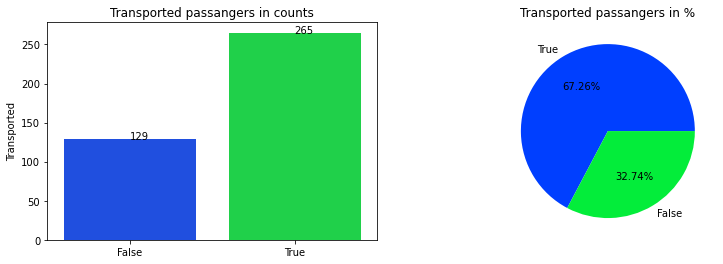

In [5]:
#Transported passangers in %
#Predictions: True for Transported, False for Lost) 
plt.figure(figsize=(13,4))
plt.subplot(121)
sbn.barplot(x=df_PSO.Transported.unique(), y=df_PSO.Transported.value_counts())
plt.title("Transported passangers in counts")
for i, j in zip(df_PSO.Transported.unique(), df_PSO.Transported.value_counts()):
    plt.annotate(str(j), xytext=(i, j), xy=(i, j))
plt.subplot(122)
plt.pie(df_PSO.Transported.value_counts(), labels=df_PSO.Transported.unique(), autopct='%.2f%%')
plt.title("Transported passangers in %")
plt.show()

#### 동면+PSO 행선지 = 394명
#### 동면+PSO 행선지+Transported 성공 = 265명(67.26%)
#### 동면+PSO 행선지+Transported 실패 = 129명(32.74%)

## 나이별 시각화

### PSO의 나이 분포
#### 1. 출발지로 구분

<Figure size 1080x288 with 0 Axes>

[Text(0, 0, '1'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '5'),
 Text(4, 0, '6'),
 Text(5, 0, '7'),
 Text(6, 0, '8'),
 Text(7, 0, '10'),
 Text(8, 0, '11'),
 Text(9, 0, '12'),
 Text(10, 0, '13'),
 Text(11, 0, '14'),
 Text(12, 0, '15'),
 Text(13, 0, '16'),
 Text(14, 0, '17'),
 Text(15, 0, '18'),
 Text(16, 0, '19'),
 Text(17, 0, '20'),
 Text(18, 0, '21'),
 Text(19, 0, '22'),
 Text(20, 0, '23'),
 Text(21, 0, '24'),
 Text(22, 0, '25'),
 Text(23, 0, '26'),
 Text(24, 0, '27'),
 Text(25, 0, '28'),
 Text(26, 0, '29'),
 Text(27, 0, '30'),
 Text(28, 0, '31'),
 Text(29, 0, '32'),
 Text(30, 0, '33'),
 Text(31, 0, '34'),
 Text(32, 0, '35'),
 Text(33, 0, '36'),
 Text(34, 0, '37'),
 Text(35, 0, '38'),
 Text(36, 0, '39'),
 Text(37, 0, '40'),
 Text(38, 0, '41'),
 Text(39, 0, '42'),
 Text(40, 0, '43'),
 Text(41, 0, '44'),
 Text(42, 0, '45'),
 Text(43, 0, '46'),
 Text(44, 0, '47'),
 Text(45, 0, '48'),
 Text(46, 0, '49'),
 Text(47, 0, '50'),
 Text(48, 0, '51'),
 Text(49, 0, '52'),
 Text(50, 0, '53'

Text(0.5, 1.0, 'Visualizing people of different ages travelled to PSO')

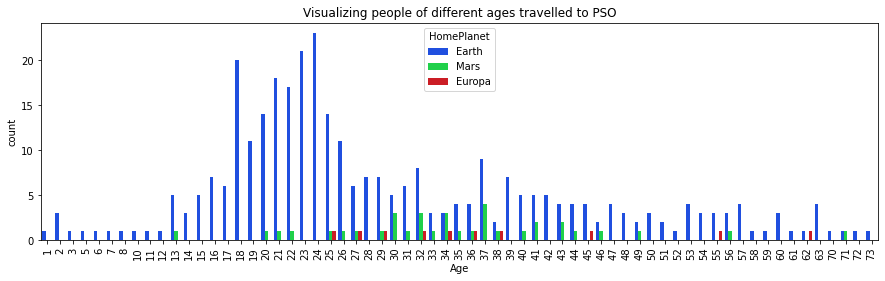

In [7]:
#Visualizing people of different ages travelled from HomePlanet
plt.figure(figsize=(15,4))
warnings.filterwarnings('ignore')
Age_nomiss=df_PSO[~(df_PSO.Age.isna())]
Age_nomiss['Age']=Age_nomiss.Age.astype('int')
g=sbn.countplot(data=Age_nomiss, x='Age', hue='HomePlanet')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title("Visualizing people of different ages travelled to PSO")
plt.show()

#### 2. 도착지로 구분

<Figure size 1080x288 with 0 Axes>

[Text(0, 0, '1'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '5'),
 Text(4, 0, '6'),
 Text(5, 0, '7'),
 Text(6, 0, '8'),
 Text(7, 0, '10'),
 Text(8, 0, '11'),
 Text(9, 0, '12'),
 Text(10, 0, '13'),
 Text(11, 0, '14'),
 Text(12, 0, '15'),
 Text(13, 0, '16'),
 Text(14, 0, '17'),
 Text(15, 0, '18'),
 Text(16, 0, '19'),
 Text(17, 0, '20'),
 Text(18, 0, '21'),
 Text(19, 0, '22'),
 Text(20, 0, '23'),
 Text(21, 0, '24'),
 Text(22, 0, '25'),
 Text(23, 0, '26'),
 Text(24, 0, '27'),
 Text(25, 0, '28'),
 Text(26, 0, '29'),
 Text(27, 0, '30'),
 Text(28, 0, '31'),
 Text(29, 0, '32'),
 Text(30, 0, '33'),
 Text(31, 0, '34'),
 Text(32, 0, '35'),
 Text(33, 0, '36'),
 Text(34, 0, '37'),
 Text(35, 0, '38'),
 Text(36, 0, '39'),
 Text(37, 0, '40'),
 Text(38, 0, '41'),
 Text(39, 0, '42'),
 Text(40, 0, '43'),
 Text(41, 0, '44'),
 Text(42, 0, '45'),
 Text(43, 0, '46'),
 Text(44, 0, '47'),
 Text(45, 0, '48'),
 Text(46, 0, '49'),
 Text(47, 0, '50'),
 Text(48, 0, '51'),
 Text(49, 0, '52'),
 Text(50, 0, '53'

Text(0.5, 1.0, 'Visualizing people of different ages travelled to Destination')

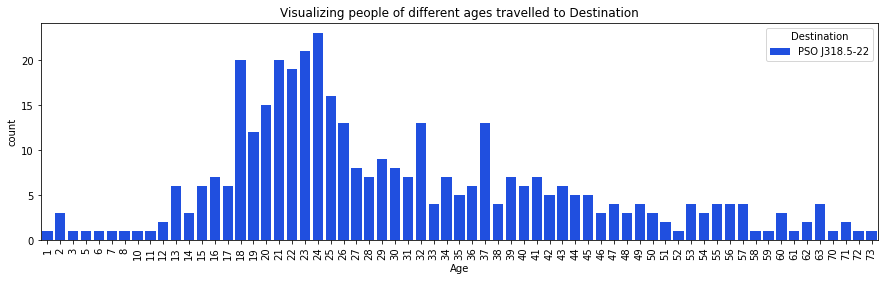

In [8]:
#Visualizing people of different ages travelled to Destination
plt.figure(figsize=(15,4))
warnings.filterwarnings('ignore')
Age_nomiss=df_PSO[~(df_PSO.Age.isna())]
Age_nomiss['Age']=Age_nomiss.Age.astype('int')
g=sbn.countplot(data=Age_nomiss, x='Age', hue='Destination')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title("Visualizing people of different ages travelled to Destination")
plt.show()

## VIP 여부
#### VIP인 사람 : 4.71%, VIP가 아닌 사람 : 95.29%

Text(0.5, 0, 'VIP')

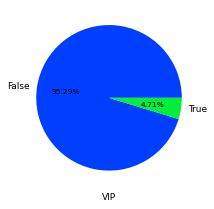

In [9]:
#Visualizing Percentages of people in 'VIP'
import matplotlib as mpl
mpl.rcParams['font.size'] = 9.0
fig = plt.figure(figsize=(15,9))
columns=['VIP']
for i, col in enumerate(columns):
    q, r = divmod(i,4)
    ax = fig.add_subplot(int(str(q+1)+"4"+str(r+1)))
    indeces = df_PSO[col].value_counts().index
    patches, texts, autotexts = ax.pie(df_PSO[col].value_counts(), labels=indeces, autopct='%.2f%%')
    for auto in autotexts:
        auto.set_fontsize(7.5)
    plt.xlabel(col)
plt.show()

<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

<AxesSubplot:xlabel='Destination', ylabel='count'>

<AxesSubplot:xlabel='VIP', ylabel='count'>

ValueError: Could not interpret input 'Deck'

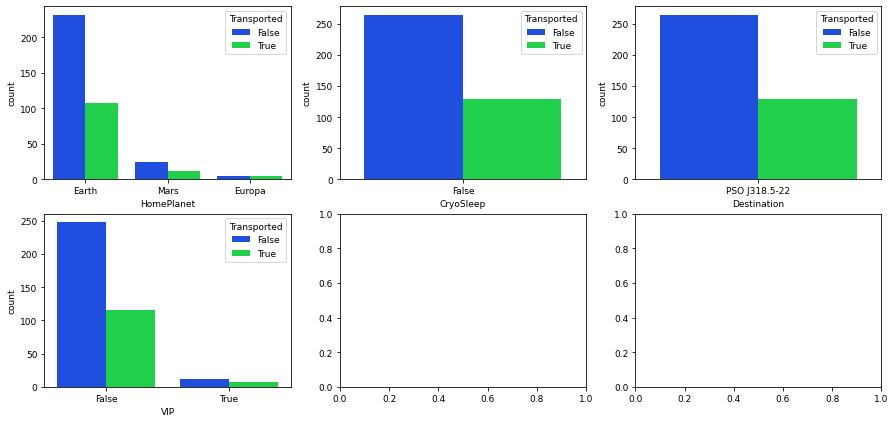

In [10]:
#Transported passangers in category wise
columns=['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']
q, r =divmod(len(columns), 3)
fig, ax=plt.subplots(q, 3, figsize=(15,7))
for i in range(0,len(columns)):
    q, r =divmod(i, 3)
    sbn.countplot(data=df_PSO, x=columns[i], hue='Transported', ax=ax[q, r])
plt.show()

In [11]:
df_PSO_g = df_PSO.groupby('Transported').count()
df_PSO_g

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
Transported,,,,,,,,,,,,,
False,265,261,265,255,265,261,259,259,260,263,260,259,258
True,129,125,129,128,129,127,123,124,125,127,124,127,129


<AxesSubplot:xlabel='Age', ylabel='Count'>

<AxesSubplot:xlabel='RoomService', ylabel='Count'>

<AxesSubplot:xlabel='FoodCourt', ylabel='Count'>

<AxesSubplot:xlabel='ShoppingMall', ylabel='Count'>

<AxesSubplot:xlabel='Spa', ylabel='Count'>

<AxesSubplot:xlabel='VRDeck', ylabel='Count'>

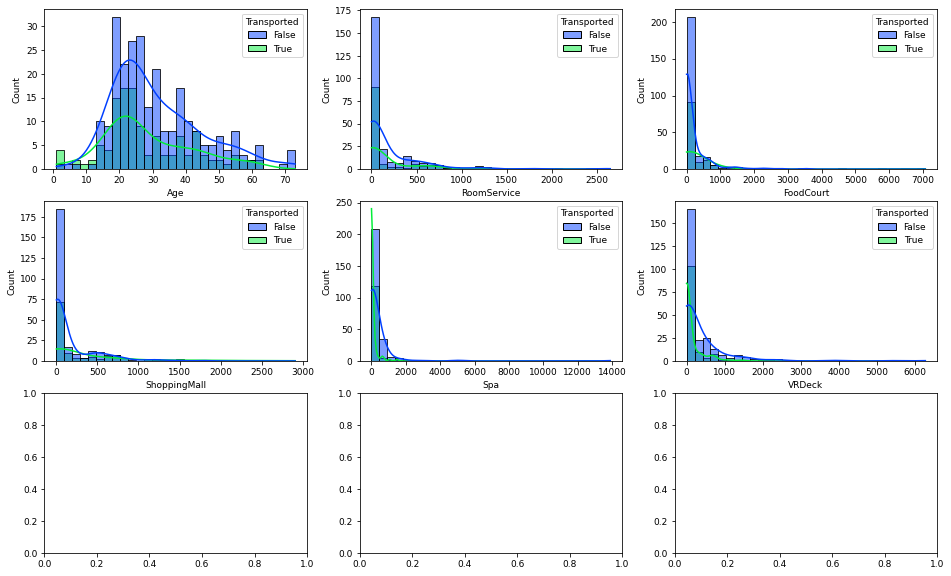

In [12]:
#Visualizing distribution of the data
columns=['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
q, r =divmod(len(columns), 3)
fig, ax=plt.subplots(q+1, 3, figsize=(16,10))
for i in range(0,len(columns)):
    q, r =divmod(i, 3)
    sbn.histplot(data=df_PSO, x=columns[i], hue='Transported', ax=ax[q, r], kde=True, bins=30)
plt.show()

<AxesSubplot:xlabel='Age', ylabel='RoomService'>

<AxesSubplot:xlabel='Age', ylabel='FoodCourt'>

<AxesSubplot:xlabel='Age', ylabel='ShoppingMall'>

<AxesSubplot:xlabel='Age', ylabel='Spa'>

<AxesSubplot:xlabel='Age', ylabel='VRDeck'>

<AxesSubplot:xlabel='RoomService', ylabel='FoodCourt'>

<AxesSubplot:xlabel='RoomService', ylabel='ShoppingMall'>

<AxesSubplot:xlabel='RoomService', ylabel='Spa'>

<AxesSubplot:xlabel='RoomService', ylabel='VRDeck'>

<AxesSubplot:xlabel='FoodCourt', ylabel='ShoppingMall'>

<AxesSubplot:xlabel='FoodCourt', ylabel='Spa'>

<AxesSubplot:xlabel='FoodCourt', ylabel='VRDeck'>

<AxesSubplot:xlabel='ShoppingMall', ylabel='Spa'>

<AxesSubplot:xlabel='ShoppingMall', ylabel='VRDeck'>

<AxesSubplot:xlabel='Spa', ylabel='VRDeck'>

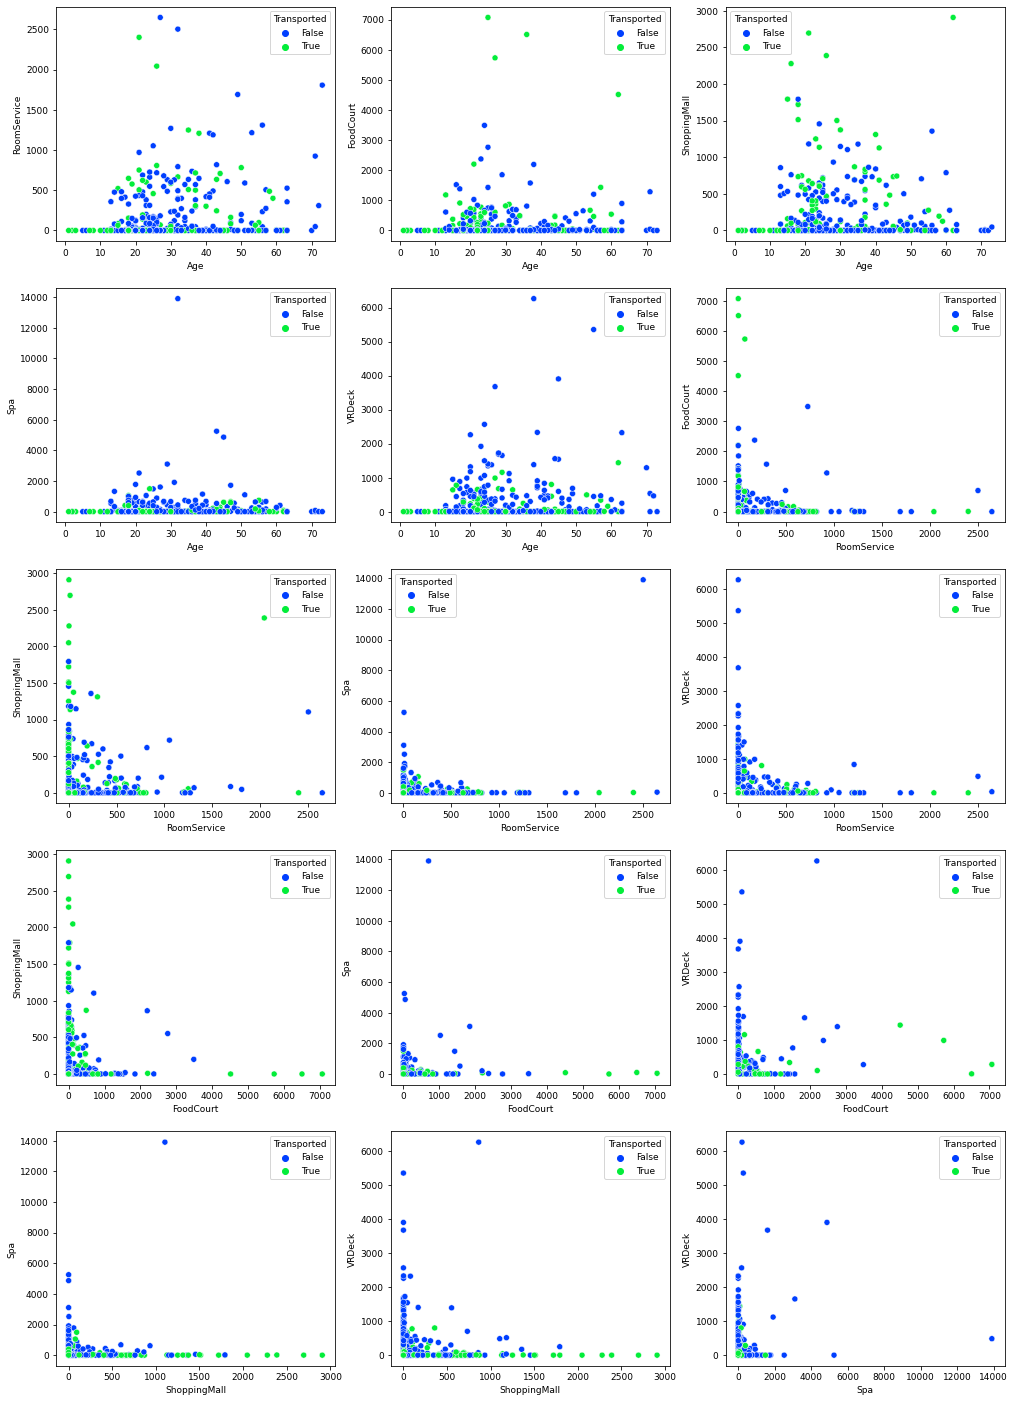

In [13]:
#Visualizing Relationships between variables 
columns=['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
q, r =divmod(int(len(columns)*(len(columns)-1)/2), 3)
fig, ax=plt.subplots(q, 3, figsize=(17,25))
k=0
for i in range(0,len(columns)):
    for j in range(i+1,len(columns)):
        q, r =divmod(k, 3)
        k+=1
        sbn.scatterplot(data=df_PSO, x=columns[i], y=columns[j], ax=ax[q, r], hue='Transported')
plt.show()

<Figure size 792x792 with 0 Axes>

<AxesSubplot:>

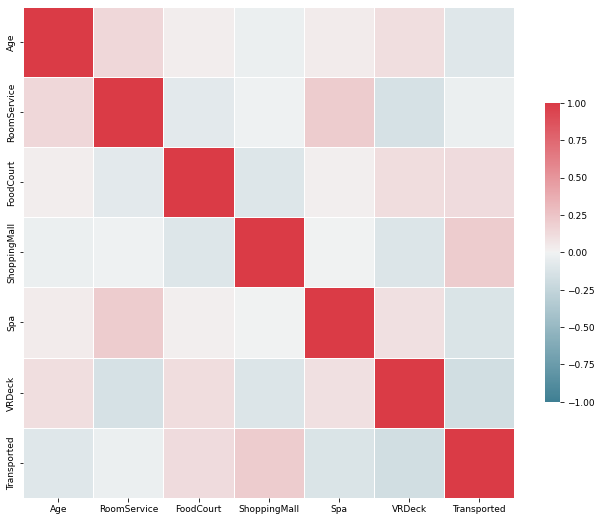

In [14]:
corr = df_PSO.corr(method='pearson')
import seaborn as sns
import matplotlib.pyplot as plt

cmap = sns.diverging_palette(220,10,as_cmap=True)

plt.figure(figsize =(11,11))
sns.heatmap(corr, cmap = cmap, vmax=1.0, vmin = -1.0, center =0, square= True, linewidths=.5, cbar_kws={'shrink':.5})
plt.show()